Objetivo:
1. Escoger 20.000 galaxias Al Azar.   
2. Realizar el BPT clásico.  
3. Líneas de separación de fuente de ionización según ecuaciones de: **The Host Galaxies and Classification of Active Galactic Nuclei - 2006**  
4. Con Z < 0.8  

In [1]:
%run "C:\Users\Cristina Quiazúa M\Desktop\MyBPT\Crossmatching\1. Datos IRAS Y SDSS.ipynb"

Could not import regions, which is required for some of the functionalities of this module.
Valores duplicados en la columna 'ra': [132.58559 179.51375 185.48906 351.8132 ]
Índices de los valores duplicados en la columna 'ra': Int64Index([4105, 5929, 6215, 11228], dtype='int64')
Índices de TODAS las ocurrencias de valores duplicados en la columna 'ra': Int64Index([4100, 4105, 5928, 5929, 6213, 6215, 11227, 11228], dtype='int64')


C:\ProgramData\Anaconda33\lib\site-packages\astroquery\sdss\core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


Número de valores únicos: 293697
Número de valores repetidos 1 vez: 14895
Número de valores repetidos 2 veces: 1239
Número de valores repetidos 3 veces: 211
Número de valores repetidos 4 veces: 242
Número de valores repetidos 5 veces: 45
Número de valores repetidos 6 veces: 14
Número de valores repetidos 7 veces: 3
Número de valores repetidos 8 veces: 0
Número de valores repetidos 9 veces: 0
Número de valores repetidos 10 veces: 0
Valores duplicados en la columna 'ra': [146.9639  146.94999 146.63167 ... 257.38367 258.13561 257.98823]
Índices de los valores duplicados en la columna 'ra': Int64Index([     5,      7,      8,      9,     10,     12,     15,     18,
                20,     22,
            ...
            329098, 329099, 329100, 329102, 329103, 329116, 329285, 329438,
            329439, 329576],
           dtype='int64', length=19304)
Índices donde el valor de 'ra' es igual a 145.51241: Int64Index([167, 170], dtype='int64')


In [2]:
SDSS[0:3]

,specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,oi_6300_flux,class,subclass
0,299489677444933632,146.71421,-1.041304,0.021222,472.59040,119.49560,68.39606,74.30252,224.11360,124.71150,84.18053,18.594930,b'GALAXY',b'STARFORMING'
1,299490502078654464,146.62857,-0.765137,0.064656,99.40005,25.64047,21.44437,17.10464,51.59155,35.33497,21.65778,8.490424,b'GALAXY',b'STARFORMING'
2,299491051364706304,146.96390,-0.545003,0.055988,181.52620,47.36650,11.85567,17.94872,54.13749,31.28298,19.16762,4.319232,b'GALAXY',b'STARBURST'


In [3]:
len(SDSS)

310346

In [4]:
type(SDSS)

pandas.core.frame.DataFrame

In [5]:
numero_filas_a_elegir = 20000
data = SDSS.sample(n=numero_filas_a_elegir, random_state=42)  # random_state siempre este resultado

In [6]:
len(data)

20000

## Razones

In [7]:
ejey_OHb=np.log((data['oiii_5007_flux'])/(data['h_beta_flux']))

ejex_NH=np.log((data['nii_6548_flux']+data['nii_6584_flux'])/data['h_alpha_flux'])
ejex_SH=np.log((data['sii_6717_flux']+data['sii_6731_flux'])/data['h_alpha_flux'])
ejex_OH=np.log((data['oi_6300_flux'])/(data['h_alpha_flux']))

## Gráficas

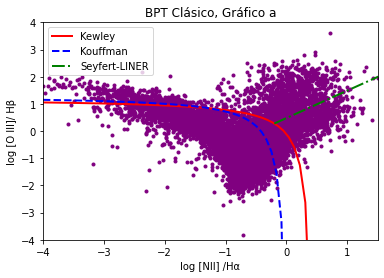

In [8]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(ejex_NH, ejey_OHb, marker=".", color="purple")
# Cuadrado:
ax.set_xlim([-4, 1.5])
ax.set_ylim([-4, 4])
plt.title('BPT Clásico, Gráfico a')
plt.ylabel('log [O III]/ Hβ')
plt.xlabel('log [NII] /Hα')

# Kewley
x1 = np.linspace(-4,0.4)  
y1 = 1.19 + (0.61/(x1-0.47))
plt.plot(x1, y1, '-', color='red', lw=2, label= 'Kewley') 


# Kauffmann
x2 = np.linspace(-4,0)
y2 = 1.3 + (0.61/(x2-0.05))
plt.plot(x2, y2, '--', color='blue', lw=2, label='Kouffman')


# Seyfert-LINER
x3 = np.linspace(-0.2,5)
y3 = 1.01 * x3 +0.48
plt.plot(x3, y3, '-.', color='green', lw=2, label='Seyfert-LINER')

plt.legend()

Debajo de la línea azul: HII - Galaxias formadoras de estrellas.  
Entre línea azul y roja: Galaxias compuestas.  
Arriba de la línea roja: AGNs.

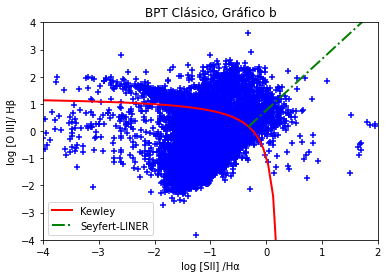

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.scatter(ejex_SH,ejey_OHb, marker="+", color="blue")
# Cuadrado:
ax1.set_xlim([-4, 2])
ax1.set_ylim([-4, 4])
plt.title('BPT Clásico, Gráfico b')
plt.ylabel('log [O III]/ Hβ')
plt.xlabel('log [SII] /Hα')

# Kewley
x1 = np.linspace(-4,0.3) 
y1 = 1.30 + (0.72/(x1-0.32))
plt.plot(x1, y1, '-' , color='red', lw=2, label= 'Kewley') 


# Seyfert-LINER
x2 = np.linspace(-0.32,4.0)
y2 = 0.76 + (1.89*x2)
plt.plot(x2, y2, '-.', color='green', lw=2, label='Seyfert-LINER')

plt.legend()

Debajo de la línea roja: Regiones HII.  
Encima de la línea Seyfert-LINER: Seyfert   
Debajo de la línea Seyfert-LINER: LINER 

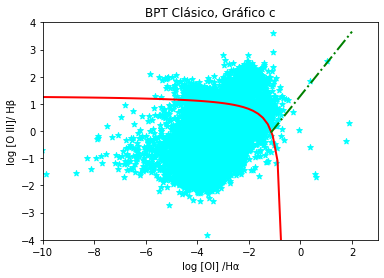

In [10]:
fig = plt.figure()
ax2 = fig.add_subplot() 
ax2.scatter(ejex_OH, ejey_OHb, marker="*", color="cyan")

# Cuadrado:
ax2.set_xlim([-10, 3])
ax2.set_ylim([-4, 4])
plt.title('BPT Clásico, Gráfico c')
plt.ylabel('log [O III]/ Hβ')
plt.xlabel('log [OI] /Hα')

# Kewley
x1 = np.linspace(-10,-0.7) 
y1 = 1.33 + (0.73/(x1+0.59))
plt.plot(x1, y1, '-', color='red', lw=2, label= 'Kewley') 


# Seyfert-LINER
x2 = np.linspace(-1.15,2)
y2 = 1.30 + (1.18*x2) 
plt.plot(x2, y2, '-.', color='green', lw=2, label='Seyfert-LINER')


# plt.legend()

# Conclusiones:
Con 20.000 objetos, distribuidos según 4 clasificaciones se realizan los respectivos BPT, con las curvas teóricas de separación, según: The Host Galaxies and Classification of Active Galactic Nuclei - 2006  